# Feature Selection

Feature selection is important because it helps identify the most relevant variables for a predictive model. By removing redundant or irrelevant features, it reduces overfitting, improves model performance, and speeds up computation. It also makes models easier to interpret and can reveal the most influential factors in the data.


#### Import necessary libraries and load data.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold


In [7]:
df = pd.read_parquet('../data/processed/featured_df.parquet')
df.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,INCOME_CREDIT_RATIO,INCOME_GOODS_RATIO,CREDIT_GOODS_RATIO,CREDIT_GOODS_DIFF,AGE_AT_APPLICATION,SOCIAL_CIRCLE_ACTIVITY,INCOME_PER_FAMILY_MEMBER
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,Cash loans,M,False,True,0,7.295964,57.013203,24700.5,42.383278,Unaccompanied,...,0.0,1.0,1,0.053541,0.070043,1.345182,14.629925,25.920548,0.136154,1.120150
100003,Cash loans,F,False,False,0,7.386925,72.501748,35698.5,52.455784,Family,...,0.0,0.0,0,0.049380,0.065441,1.382150,20.045964,45.931507,0.000000,0.945752
100004,Revolving loans,M,True,True,0,6.925281,45.138362,6750.0,35.447659,Unaccompanied,...,0.0,0.0,0,0.056296,0.072543,1.273381,9.690703,52.180822,0.000000,1.108186
100006,Cash loans,F,False,True,0,7.163551,53.952290,29686.5,41.092389,Unaccompanied,...,0.0,0.0,0,0.054144,0.070307,1.312951,12.859901,52.068493,0.000000,0.937014
100007,Cash loans,M,False,True,0,7.128317,59.854203,21865.5,45.448186,Unaccompanied,...,0.0,0.0,0,0.052305,0.068001,1.316977,14.406018,54.608219,0.000000,1.114845


For feature selection we need to encode the categorical variables. We are going to use the OneHotEncoder for this task.

In [8]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(exclude=['object', 'category']).columns

# One-hot encoding
encoder = OneHotEncoder(sparse_output=False,drop='first')
encoded_categorical = encoder.fit_transform(df[categorical_cols])
encoded_categorical_df = pd.DataFrame(encoded_categorical, 
                                      columns=encoder.get_feature_names_out(categorical_cols),
                                      index = df.index)

df = pd.concat([encoded_categorical_df, df[numerical_cols]], axis=1)
df.head()

,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,...,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,INCOME_CREDIT_RATIO,INCOME_GOODS_RATIO,CREDIT_GOODS_RATIO,CREDIT_GOODS_DIFF,AGE_AT_APPLICATION,SOCIAL_CIRCLE_ACTIVITY,INCOME_PER_FAMILY_MEMBER
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1,0.053541,0.070043,1.345182,14.629925,25.920548,0.136154,1.120150
100003,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0,0.049380,0.065441,1.382150,20.045964,45.931507,0.000000,0.945752
100004,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0,0.056296,0.072543,1.273381,9.690703,52.180822,0.000000,1.108186
100006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0,0.054144,0.070307,1.312951,12.859901,52.068493,0.000000,0.937014
100007,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0,0.052305,0.068001,1.316977,14.406018,54.608219,0.000000,1.114845


## Variance Threshold

Variance Threshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. In our case the threshold we will use is 0.01.

We will use the VarianceThreshold from sklearn to remove features with low variance. 

In order to do this, we will split the data into X and y.

In [9]:
X = df.drop('TARGET', axis=1)
y = df['TARGET']

To apply the VarianceThreshold we need to scale the data. In this case, we are going to use the MinMaxScaler. With this scaler, we can scale the data to a range of [0,1].

In [10]:

# Scale the features, using MinMaxScaler
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

# Calculate the variance of each feature
variances = scaled_X.var(axis=0)

# Sort the variances in descending order
sorted_indices = np.argsort(-variances)
sorted_variances = variances[sorted_indices]
sorted_columns = X.columns[sorted_indices]

# Print the sorted variances
for col, var in zip(sorted_columns, sorted_variances):
    print(f"{col}: {var}")

NAME_INCOME_TYPE_Working: 0.2484353762048318
NAME_FAMILY_STATUS_Married: 0.23068569617742776
CODE_GENDER_M: 0.2249106463654491
FLAG_OWN_CAR: 0.22381864776809018
OCCUPATION_TYPE_Laborers: 0.21369826509001583
FLAG_OWN_REALTY: 0.21159995113902538
NAME_EDUCATION_TYPE_Secondary / secondary special: 0.2005053216517284
FLAG_DOCUMENT_3: 0.19964734548589266
FLAG_PHONE: 0.19660657722858044
REG_CITY_NOT_WORK_CITY: 0.18214520107368923
ORGANIZATION_TYPE_Business Entity Type 3: 0.1718270511404534
FLAG_WORK_PHONE: 0.15785493976081785
NAME_TYPE_SUITE_Unaccompanied: 0.15456226524795277
LIVE_CITY_NOT_WORK_CITY: 0.1516748939087533
WEEKDAY_APPR_PROCESS_START_TUESDAY: 0.14416187020938923
FLAG_EMP_PHONE: 0.14101446706101706
NAME_INCOME_TYPE_Pensioner: 0.14100442578193095
ORGANIZATION_TYPE_XNA: 0.14098685243051784
WEEKDAY_APPR_PROCESS_START_WEDNESDAY: 0.14039355049157728
WEEKDAY_APPR_PROCESS_START_THURSDAY: 0.13753042836610013
WEEKDAY_APPR_PROCESS_START_MONDAY: 0.1372982522774575
DAYS_EMPLOYED: 0.12981206972

Let's plot these results.

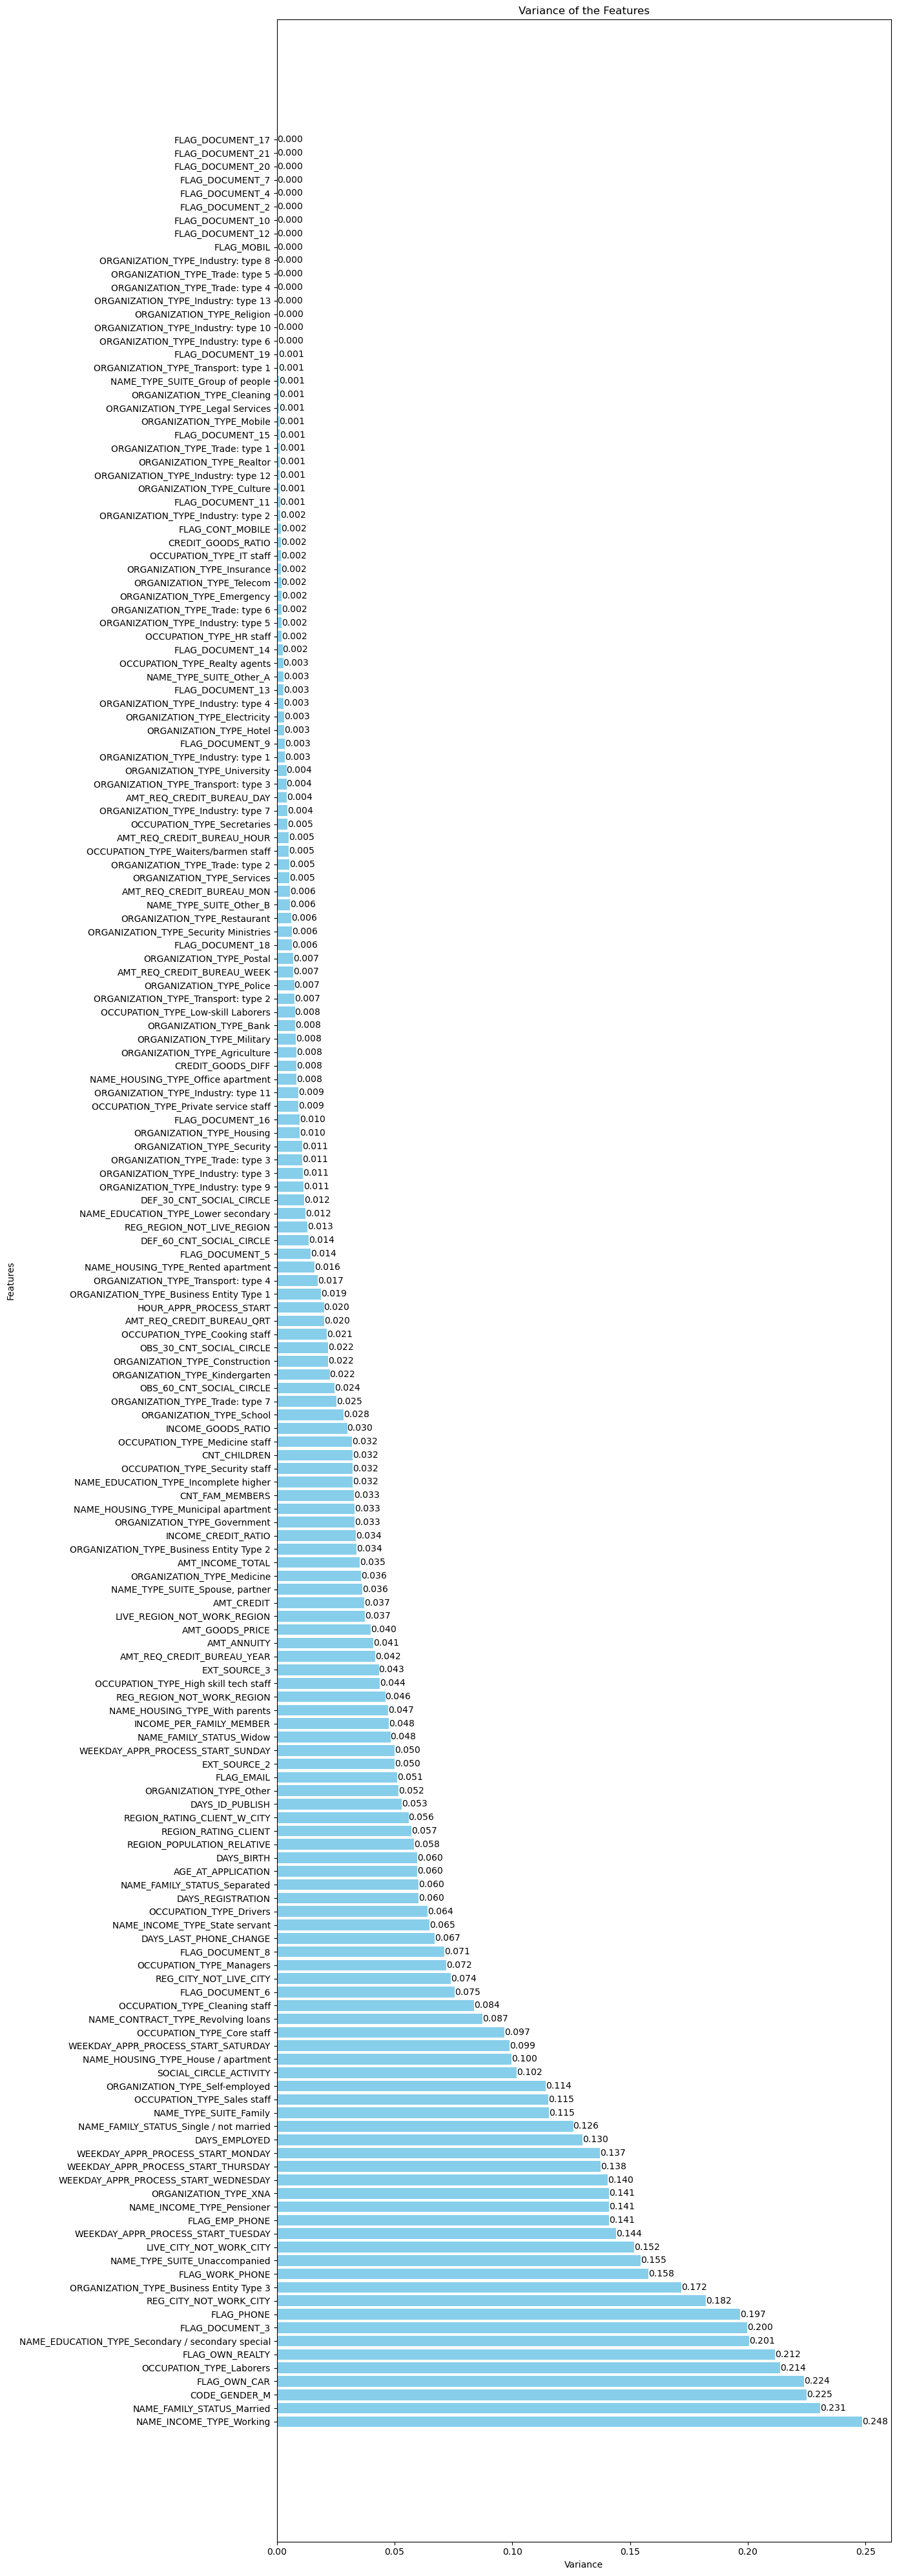

In [11]:
top_variances = sorted_variances
top_columns = sorted_columns

plt.figure(figsize=(14, 40))  
bars = plt.barh(top_columns, top_variances, color='skyblue')  
plt.xlabel('Variance')
plt.ylabel('Features')
plt.title(f'Variance of the Features')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
             f'{bar.get_width():.3f}', 
             va='center', ha='left', fontsize=10)

plt.tight_layout()  
plt.show()

We are going to filter the features with a variance greater than 0.01

In [12]:
varianceSelector = VarianceThreshold(threshold=0.01)
varianceSelector.fit(scaled_X)

selected_features_mask = varianceSelector.get_support()

selected_features = X.columns[selected_features_mask]
discarded_features = X.columns[~selected_features_mask]

print(f"Selected features: {selected_features}")
print(f"Discarded features: {discarded_features}")
print(f"Number of selected features: {len(selected_features)}")
print(f"Number of discarded features: {len(discarded_features)}")

Selected features: Index(['NAME_CONTRACT_TYPE_Revolving loans', 'CODE_GENDER_M',
       'NAME_TYPE_SUITE_Family', 'NAME_TYPE_SUITE_Spouse, partner',
       'NAME_TYPE_SUITE_Unaccompanied', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents',
       'OCCUPATION_TYPE_Cleaning staff', 'OCCUPATION_TYPE_Cooking staff',
       'OCCUPATION_TYPE_Core staff', 'OCCUPATION_TYPE_Drivers',
       'OCCUPATION_TYPE_High skill tech staff', 'OCCUPATION_TYPE_Laborers',
       'OCCUPATION_TYPE_

We still have a lot of features after the VarianceThreshold. We are going to use the SelectFromModel to select the most important features for each model. Using this approach we aim to maximize the predictive power of the models.

For now, we are going to reconstruct the data with the selected features and save it.

In [13]:
df = pd.concat([df[selected_features], y], axis=1)
df.to_parquet('../data/processed/selected_features_df.parquet')